
Ex 1 : Load the dataset and libraries

In [66]:
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb

In [67]:
try :
# % tensorflow_version only exists in Colab .
  %tensorflow_version 2.x
except Exception :
  pass
from keras . datasets import boston_housing

In [68]:
( train_data , train_targets ) , ( test_data , test_targets ) =boston_housing.load_data ()


In [69]:
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape} \n')
print(f'Training sample at line 0 : {train_data[0]}')
print(f'Training target sample at line 0: {train_targets[0]}')

Training data : (404, 13)
Test data : (102, 13) 

Training sample at line 0 : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample at line 0: 15.2


<br><br><br>Ex 2 :  Normalize those 2 datasets ( subtract the mean of the feature and divide by the standard
deviation ) We have to keep the mean and std of the training set

In [70]:
mean_data = train_data.mean(axis=0)
train_data -= mean_data
std = train_data.std(axis=0)
train_data /= std
test_data -= mean_data
test_data /= std

In [71]:
len(train_data[0])

13

Ex 3 : Model definition

In [72]:
from keras import models
from keras import layers
def build_model (nb_units) :
  model = models.Sequential()
  model.add(layers.Dense(nb_units, activation = "relu", input_shape=(13, )))
  model.add(layers.Dense(nb_units, activation = "relu"))
  model.add(layers.Dense(1)) #with no activation function
  model.compile(optimizer = "rmsprop",loss = "mse",metrics = ["mae"]) # mse as loss function and mae as metric
  return model


<br><br><br>Ex 4 : Model validation

In [73]:
import numpy as np
k = 4
num_val_samples = len ( train_data ) // k
num_epochs = 100
all_scores = []
for i in range (k ):
  print ('processing fold #', i )
  val_data = train_data [i * num_val_samples : ( i + 1) *num_val_samples ]
  val_targets = train_targets [i * num_val_samples : (i + 1) *num_val_samples ]
  partial_train_data = np . concatenate ([ train_data [: i *num_val_samples ], train_data [( i + 1) * num_val_samples :]] , axis=0)
  partial_train_targets = np . concatenate ([ train_targets [: i *num_val_samples ], train_targets [( i + 1) * num_val_samples :]] ,axis =0)
  model=build_model(64)
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,validation_data=(val_data,val_targets))
  """ the following line is for evaluating the test set """
  val_mse,val_mae = model.evaluate( val_data , val_targets , verbose=0)
  all_scores.append( val_mae )

processing fold # 0
Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 595.9633 - mae: 22.6159 - val_loss: 498.6385 - val_mae: 20.0849
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 521.9581 - mae: 20.8220 - val_loss: 431.6554 - val_mae: 18.3595
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 424.9102 - mae: 18.5458 - val_loss: 362.4028 - val_mae: 16.4755
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 353.3930 - mae: 16.5577 - val_loss: 291.0993 - val_mae: 14.4448
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 302.8265 - mae: 15.0583 - val_loss: 217.5592 - val_mae: 12.1546
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 227.3643 - mae: 12.5138 - val_loss: 155.8966 - val_mae: 9.8940
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 179.2409 - mae: 10.8220 - val_loss: 109.9013 - val_mae: 7.9942
Epoch 8/100
10/10 [===

<br><br><br>Ex 5 

In [74]:
print('the list of those fold scores is :{} \nThe mean of this list of scores is : {}'.format(all_scores,np.mean(all_scores)))

the list of those fold scores is :[1.867844820022583, 2.3167293071746826, 2.502291440963745, 2.4351723194122314] 
The mean of this list of scores is : 2.2805094718933105


Ex 6  : train with 500 epochs

In [75]:
import numpy as np
k = 4
num_val_samples = len ( train_data ) // k
num_epochs = 500
all_scores = []
for i in range (k ):
  print ('processing fold #', i )
  val_data = train_data [i * num_val_samples : ( i + 1) *num_val_samples ]
  val_targets = train_targets [i * num_val_samples : (i + 1) *num_val_samples ]
  partial_train_data = np . concatenate ([ train_data [: i *num_val_samples ], train_data [( i + 1) * num_val_samples :]] , axis=0)
  partial_train_targets = np . concatenate ([ train_targets [: i *num_val_samples ], train_targets [( i + 1) * num_val_samples :]] ,axis =0)
  model=build_model(64)
  history = model . fit ( partial_train_data , partial_train_targets ,validation_data =( val_data , val_targets ) , epochs = num_epochs ,batch_size =1 , verbose =0)
  mae_history = history.history['val_mae']
  """ the following line is for evaluating the test set """
  all_scores.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Ex 7

In [76]:
for i in range(4):
  print('The mean mae of this fold n°{} is : {}'.format(i,np.mean(all_scores[i])))

The mean mae of this fold n°0 is : 2.2769222798347473
The mean mae of this fold n°1 is : 2.8739044241905214
The mean mae of this fold n°2 is : 2.8610002636909484
The mean mae of this fold n°3 is : 2.589609863758087


<br><br><br><br>Ex 8 : plot epochs mae scores

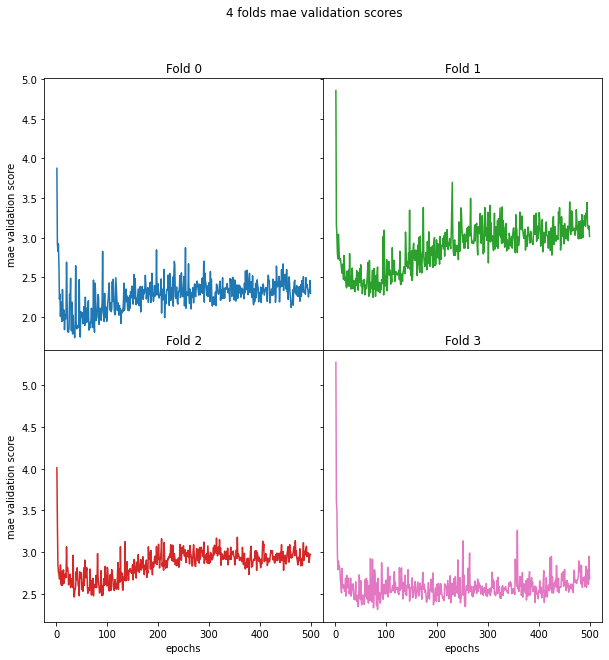

In [77]:
x=range(1,501)
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(10,10))
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('4 folds mae validation scores')
ax1.plot(x, all_scores[0])

ax1.set_ylabel('mae validation score')
ax1.set_title('Fold 0')
ax2.plot(x,all_scores[1], 'tab:green')
ax2.set_title('Fold 1')

ax3.plot(x ,all_scores[2], 'tab:red')
ax3.set_title('Fold 2')
ax3.set_xlabel('epochs')
ax3.set_ylabel('mae validation score')
ax4.plot(x , all_scores[3], 'tab:pink')
ax4.set_title('Fold 3')
ax4.set_xlabel('epochs')

for ax in axs.flat:
    ax.label_outer()

Ex 9 : The fold on which we are going to focus more is the fold 3 because it is the plot on which it is the most difficult to see

In [78]:
# 0<factor<1 
#factor = np.random.uniform(0,1)
factor=np.random.uniform(0.3,0.55)
new_pts = []


for i in range(10,len(all_scores[3])):
  point = all_scores[3][i-1] * factor + all_scores[3][i] * (1 - factor)
  new_pts.append(point)

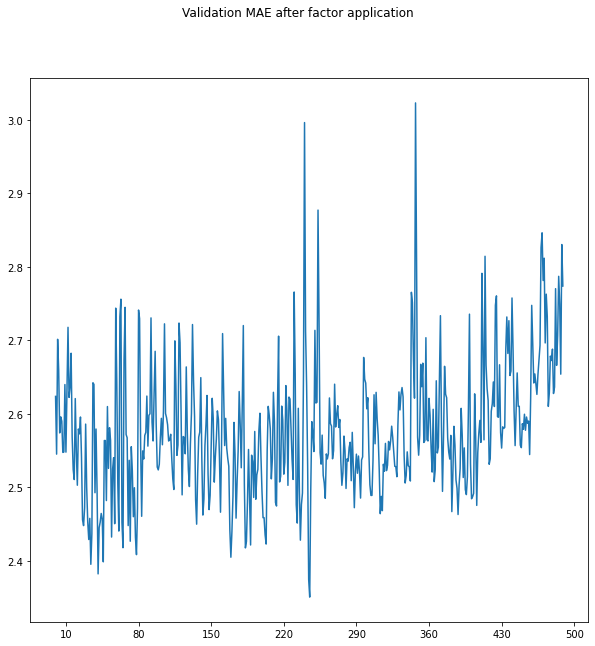

In [79]:
fig, axs = plt.subplots(figsize=(10,10))
fig.suptitle('Validation MAE after factor application ')
axs.plot(new_pts)
plt.xticks(range(10,501,70))
plt.show()

The special point on this plot is around 100 which corresponds to the lowest mae score. So the model starts overfitting past this point.

In [82]:
val_data = train_data [3 * num_val_samples : ( 3 + 1) *num_val_samples ]
val_targets = train_targets [3 * num_val_samples : (3 + 1) *num_val_samples ]
partial_train_data = np . concatenate ([ train_data [: 3 *num_val_samples ], train_data [( 3 + 1) * num_val_samples :]] , axis=0)
partial_train_targets = np . concatenate ([ train_targets [: 3 *num_val_samples ], train_targets [(  3+ 1) * num_val_samples :]] ,axis =0)

In [83]:
tune_model=build_model(20)

In [87]:
param_epoch =[20,25,30,35]

In [88]:
tune_score = []
for i in param_epoch :
  history = tune_model.fit(x=partial_train_data, y=partial_train_targets, epochs=i,validation_data=(val_data,val_targets),batch_size=1,verbose=0)
  tune_score.append ( history.history ['val_mae'] )

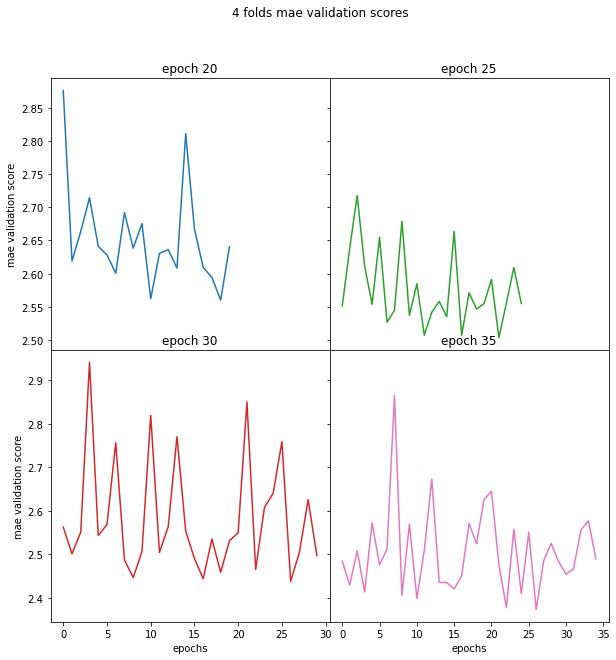

In [91]:

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(10,10))
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('4 epochs values mae validation scores')
ax1.plot(tune_score[0])

ax1.set_ylabel('mae validation score')
ax1.set_title('epoch 20')
ax2.plot(tune_score[1], 'tab:green')
ax2.set_title('epoch 25')

ax3.plot(tune_score[2], 'tab:red')
ax3.set_title('epoch 30')
ax3.set_xlabel('epochs')
ax3.set_ylabel('mae validation score')
ax4.plot(tune_score[3], 'tab:pink')
ax4.set_title('epoch 35')
ax4.set_xlabel('epochs')

for ax in axs.flat:
    ax.label_outer()

The model with the lowest curve is the mdoel with 25 epochs, so let's keep this number of epochs. <br>
Let's now move on the number of units in a layer. 

In [92]:
param_nb_units =[20,30,40,50]

In [93]:
tune_unit_score = []
for i in param_nb_units :
  model_grid= build_model(i)
  history = model_grid.fit(x=partial_train_data, y=partial_train_targets, epochs=25,validation_data=(val_data,val_targets),batch_size=1,verbose=0)
  tune_unit_score.append ( history.history ['val_mae'] )

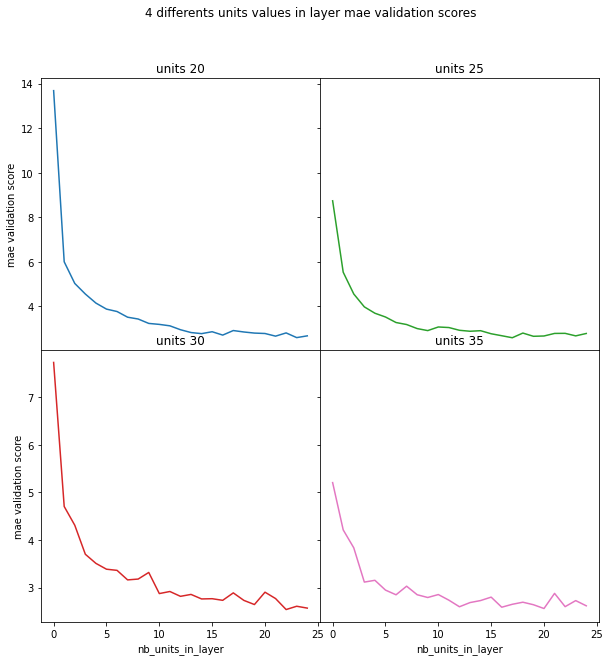

In [94]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(10,10))
(ax1, ax2), (ax3, ax4) = axs
fig.suptitle('4 differents units values in layer mae validation scores')
ax1.plot(tune_unit_score[0])

ax1.set_ylabel('mae validation score')
ax1.set_title('units 20')
ax2.plot(tune_unit_score[1], 'tab:green')
ax2.set_title('units 25')

ax3.plot(tune_unit_score[2], 'tab:red')
ax3.set_title('units 30')
ax3.set_xlabel('nb_units_in_layer')
ax3.set_ylabel('mae validation score')
ax4.plot(tune_unit_score[3], 'tab:pink')
ax4.set_title('units 35')
ax4.set_xlabel('nb_units_in_layer')

for ax in axs.flat:
    ax.label_outer()

We can see here that the best mae curve is given by 25 epochs and 20 units neurons in the layer.

<br><br><br><br>
Ex 10 : predict and compare to test targets

In [95]:
model_terminal=build_model(20)
model_terminal.fit(x=train_data,y=train_targets,epochs=25,batch_size=1,verbose=0)

In [96]:
pred=model_terminal.predict(test_data)

In [100]:
from sklearn import metrics

In [101]:
mae_terminal=metrics.mean_absolute_error(test_targets,pred)

In [103]:
print('After grid search, our mae between our pred and test_set is : {}'.format(mae_terminal))

After grid search, our mae between our pred and test_set is : 2.7299253529193357


In [105]:
%%shell

jupyter nbconvert --to html /content/trang_week3_boston.ipynb

[NbConvertApp] Converting notebook /content/trang_week3_boston.ipynb to html
[NbConvertApp] Writing 692240 bytes to /content/trang_week3_boston.html
